In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')

# Add an overweight column to the data. 
# To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms 
# by the square of their height in meters. If that value is > 25 then the person is overweight. 
# Use the value 0 for NOT overweight and the value 1 for overweight.

def overweight_checker(x):
    if x > 25:
        return 1
    else:
        return 0

# Add 'overweight' column
df['overweight'] = df['weight']/(df['height']/100)**2
df['overweight']=df['overweight'].apply(lambda x: overweight_checker(x))

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.




In [11]:
# Normalize the data by making 0 always good and 1 always bad. 
# If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.
def always_good_checker(x):
    if x == 1:
        return 0
    else :
        return 1
df['cholesterol'] = df['cholesterol'].apply(lambda x:always_good_checker(x))
df['gluc'] = df['gluc'].apply(lambda x:always_good_checker(x))

In [12]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [17]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    # takes the entire dataframe, and makes it a df with id of cardio, and columns of cholosterol, gluc,smoke,alco,active
    # 4 columns [index,cardio,variables('gluc','smoke','alco' etc), then the values for it]
    # all the value_vars are either 1 or 0 for existence or nonexistance
    df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    # You will have to rename one of the collumns for the catplot to work correctly.
    # 
    df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable','value'])['value'].count()).rename(columns={'value':'total'}).reset_index()

    # Draw the catplot with 'sns.catplot()'
    graph = sns.catplot(x='variable',y='total',hue='value',col='cardio',data=df_cat,kind='bar')

    fig = graph.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig



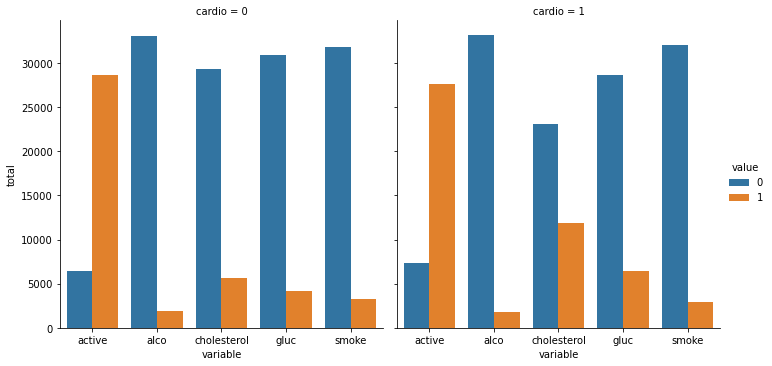

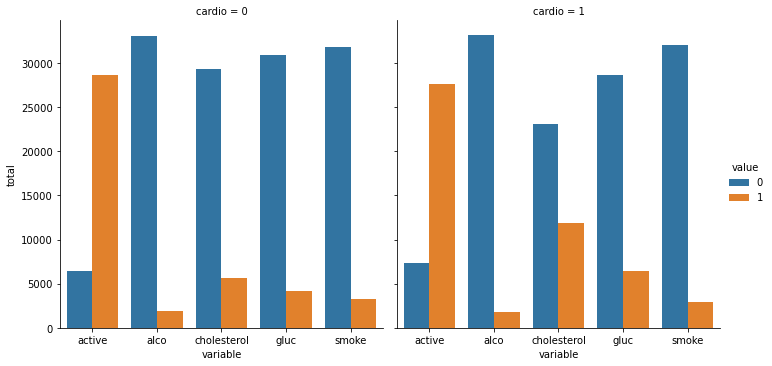

In [18]:
draw_cat_plot()

In [ ]:
# Clean the data. Filter out the following patient segments that represent incorrect data:
# diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
# height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
# weight is less than the 2.5th percentile
# weight is more than the 97.5th percentile

In [19]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    # we set up range for height column
    # we set up range for weight column,
    # then created a new dataframe for the heat map
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True



    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(12, 12))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr,linewidths=.5,annot=True,fmt='.1f',mask=mask,square=True,center=0,vmin=-0.1,vmax=0.25,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


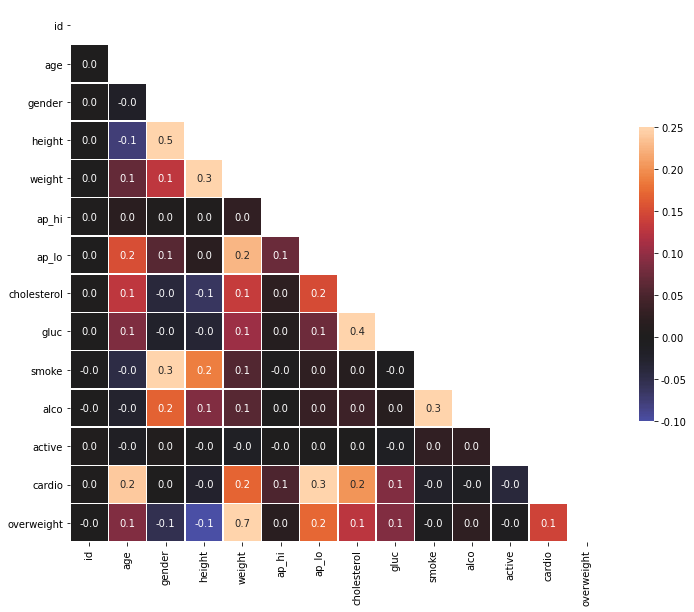

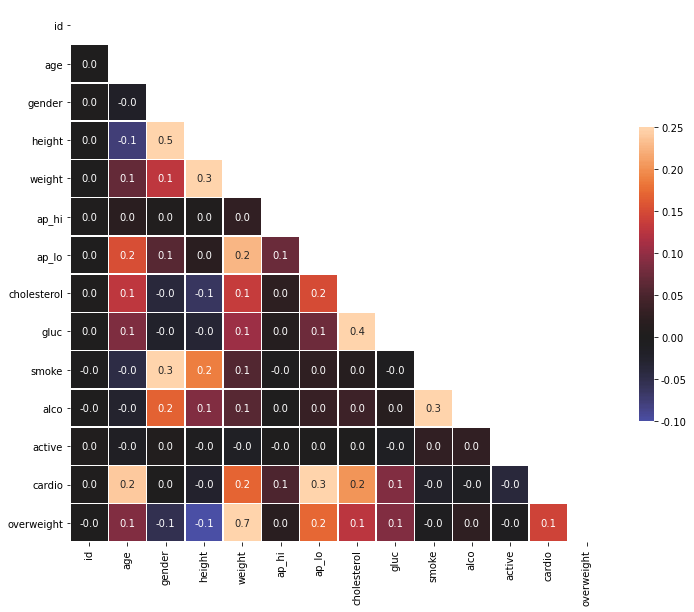

In [20]:
draw_heat_map()